<a href="https://colab.research.google.com/github/WQchoi/myRepoTest/blob/main/FM_%EC%A3%BC%EA%B8%89%EA%B3%BC_%EB%8A%A5%EB%A0%A5%EC%B9%98%EC%9D%98_%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filePath = '/content/drive/MyDrive/구글클라우드인공지능개발자과정1기/FM_2023.csv'
df = pd.read_csv(filePath, index_col='UID')

In [3]:
# 포지션별로 데이터셋 분리

att_df = df[df['Position'].str.contains('S')]
mid_df = df[df['Position'].str.contains('M')]
def_df = df[df['Position'].str.contains('D')]
gk_df = df[df['Position'].str.contains('GK')]

In [4]:
# 1. 포지션별로 높은 능력치를 파악하기위하여,
# 포지션별로 분리된 자료에서 능력치만 추출한 데이터프레임 생성

att_stat = att_df.iloc[:, 7:44]
mid_stat = mid_df.iloc[:, 7:44]
def_stat = def_df.iloc[:, 7:44]
gk_stat1 = gk_df.iloc[:, 7:44]
gk_stat2 = gk_df.iloc[:, 49:60]
gk_stat = pd.concat([gk_stat1,gk_stat2],axis=1)

In [5]:
# 자료형과 결측치 확인 (능력치에는 NAN값이 없고, 모두 정수형임을 확인)

In [6]:
att_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 85139014 to 2000194686
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Corners           1620 non-null   int64
 1   Crossing          1620 non-null   int64
 2   Dribbling         1620 non-null   int64
 3   Finishing         1620 non-null   int64
 4   First Touch       1620 non-null   int64
 5   Free Kick Taking  1620 non-null   int64
 6   Heading           1620 non-null   int64
 7   Long Shots        1620 non-null   int64
 8   Long Throws       1620 non-null   int64
 9   Marking           1620 non-null   int64
 10  Passing           1620 non-null   int64
 11  Penalty Taking    1620 non-null   int64
 12  Tackling          1620 non-null   int64
 13  Technique         1620 non-null   int64
 14  Aggressiion       1620 non-null   int64
 15  Anticipation      1620 non-null   int64
 16  Bravery           1620 non-null   int64
 17  Composure         16

In [7]:
mid_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4823 entries, 18004457 to 2000218865
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Corners           4823 non-null   int64
 1   Crossing          4823 non-null   int64
 2   Dribbling         4823 non-null   int64
 3   Finishing         4823 non-null   int64
 4   First Touch       4823 non-null   int64
 5   Free Kick Taking  4823 non-null   int64
 6   Heading           4823 non-null   int64
 7   Long Shots        4823 non-null   int64
 8   Long Throws       4823 non-null   int64
 9   Marking           4823 non-null   int64
 10  Passing           4823 non-null   int64
 11  Penalty Taking    4823 non-null   int64
 12  Tackling          4823 non-null   int64
 13  Technique         4823 non-null   int64
 14  Aggressiion       4823 non-null   int64
 15  Anticipation      4823 non-null   int64
 16  Bravery           4823 non-null   int64
 17  Composure         48

In [8]:
def_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3754 entries, 37024025 to 2000047739
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Corners           3754 non-null   int64
 1   Crossing          3754 non-null   int64
 2   Dribbling         3754 non-null   int64
 3   Finishing         3754 non-null   int64
 4   First Touch       3754 non-null   int64
 5   Free Kick Taking  3754 non-null   int64
 6   Heading           3754 non-null   int64
 7   Long Shots        3754 non-null   int64
 8   Long Throws       3754 non-null   int64
 9   Marking           3754 non-null   int64
 10  Passing           3754 non-null   int64
 11  Penalty Taking    3754 non-null   int64
 12  Tackling          3754 non-null   int64
 13  Technique         3754 non-null   int64
 14  Aggressiion       3754 non-null   int64
 15  Anticipation      3754 non-null   int64
 16  Bravery           3754 non-null   int64
 17  Composure         37

In [9]:
gk_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 18026122 to 2000222557
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Corners           697 non-null    int64
 1   Crossing          697 non-null    int64
 2   Dribbling         697 non-null    int64
 3   Finishing         697 non-null    int64
 4   First Touch       697 non-null    int64
 5   Free Kick Taking  697 non-null    int64
 6   Heading           697 non-null    int64
 7   Long Shots        697 non-null    int64
 8   Long Throws       697 non-null    int64
 9   Marking           697 non-null    int64
 10  Passing           697 non-null    int64
 11  Penalty Taking    697 non-null    int64
 12  Tackling          697 non-null    int64
 13  Technique         697 non-null    int64
 14  Aggressiion       697 non-null    int64
 15  Anticipation      697 non-null    int64
 16  Bravery           697 non-null    int64
 17  Composure         697

In [10]:
# 포지션별 능력치 순위 알아보기

att_rank = att_stat.mean().sort_values(ascending=False)
mid_rank = mid_stat.mean().sort_values(ascending=False)
def_rank = def_stat.mean().sort_values(ascending=False)
gk_rank = gk_stat.mean().sort_values(ascending=False)

In [11]:
att_rank

Off The Ball        13.206173
Pace                13.195062
Acceleration        13.186420
Finishing           12.971605
Natural Fitness     12.925309
Determination       12.866667
Technique           12.754321
Flair               12.567901
Agility             12.535802
First Touch         12.512963
Work Rate           12.306173
Dribbling           12.304938
Anticipation        12.196296
Stamina             12.115432
Balance             12.101235
Stability           11.992593
Composure           11.845062
Teamwork            11.562346
Bravery             11.558642
Strength            11.523457
Heading             11.510494
Decision            11.435802
Penalty Taking      11.355556
Passing             11.273457
Aggressiion         11.070370
Jumping Reach       11.012963
Vision              11.008642
Concentration       10.879012
Long Shots          10.675926
Crossing             9.546296
Free Kick Taking     8.861111
Leadership           8.614815
Corners              7.755556
Position.1

In [12]:
mid_rank

Technique           13.235538
Acceleration        12.978437
Natural Fitness     12.880572
First Touch         12.875181
Pace                12.838690
Agility             12.800746
Determination       12.751400
Work Rate           12.707858
Passing             12.695418
Stamina             12.473149
Dribbling           12.403483
Teamwork            12.290898
Flair               12.267883
Vision              12.256687
Off The Ball        12.213145
Stability           12.134149
Anticipation        11.917271
Decision            11.783123
Composure           11.754717
Balance             11.752022
Bravery             11.260004
Aggressiion         11.213767
Concentration       11.076508
Long Shots          10.965582
Crossing            10.743935
Finishing           10.312254
Strength            10.176861
Penalty Taking       9.835372
Free Kick Taking     9.823346
Corners              9.639851
Position.1           9.586357
Tackling             9.348953
Jumping Reach        9.259175
Leadership

In [13]:
def_rank

Work Rate           13.407299
Natural Fitness     13.290091
Teamwork            13.230421
Determination       13.202184
Stamina             13.201385
Bravery             12.939531
Tackling            12.929675
Stability           12.775440
Pace                12.597230
Anticipation        12.564198
Aggressiion         12.454981
Position.1          12.410495
Acceleration        12.400373
Balance             12.306606
Passing             12.196058
Decision            12.096697
Marking             12.081779
Strength            12.048748
Composure           11.953117
Agility             11.930208
Concentration       11.923548
Technique           11.878530
First Touch         11.788492
Jumping Reach       11.430741
Heading             11.153436
Vision              11.062866
Off The Ball        10.561268
Leadership          10.470165
Dribbling           10.249867
Crossing             9.534630
Flair                9.374267
Long Shots           9.035695
Long Throws          8.570325
Penalty Ta

In [14]:
gk_rank

Reflexes            14.347202
Jumping Reach       14.005739
One On Ones         13.159254
Handling            13.047346
Bravery             12.995696
Stability           12.942611
Determination       12.911047
Natural Fitness     12.878049
Agility             12.813486
Adaptation          12.515065
Position.1          12.456241
Kicking             12.226686
Command Of Area     12.123386
Anticipation        12.074605
Concentration       12.068867
Strength            11.985653
Communication       11.952654
Decision            11.847920
Throwing            11.820660
Balance             11.598278
Rushing Out         11.562410
Teamwork            11.512195
Composure           11.408895
Work Rate           10.866571
Punching            10.837877
Acceleration        10.758967
Pace                10.558106
Stamina             10.548063
Leadership          10.513630
Passing             10.362984
Aggressiion          9.672884
Vision               8.998565
First Touch          8.459110
Eccentrici

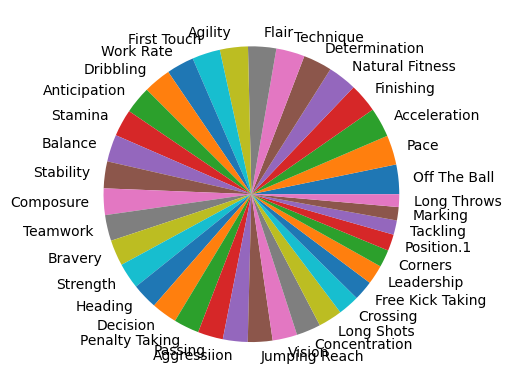

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

att_rank=pd.DataFrame(att_rank)
att_rank.columns = ['Salary']
indexx = att_rank.index
plt.pie(att_rank['Salary'],labels = indexx)
plt.show()

In [16]:
# 새롭게 DataFrame을 만들기 위해 Salary 칼럼의 nan값 확인결과 극소수의 nan값이 존재함

In [17]:
att_df[att_df.Salary.isna()]

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club
UID,,,,,,,,,,,,,,,,,,,,,
85018475,Nicolas De Préville,AM/S RL,31,129,135,France,NaN,10,12,14,...,6450,3900,Northern_European,122,6,1991/1/8,0,0,NaN,NaN
1501170,Fernando Llorente,S,37,128,165,"Spain,Pays Basque",NaN,3,9,10,...,6650,5250,Mediterranean_Hispanic,131,4,1985/2/26,24,7,NaN,NaN
25017284,Matěj Vydra,AM/S LC,30,128,136,Czech Republic,NaN,8,10,12,...,6350,5250,Northern_European,121,1,1992/5/1,46,7,NaN,NaN
8825510,Diego Tardelli,S RLC,37,123,152,"Brazil,Italy",NaN,6,12,15,...,6150,3250,Mixed_Race,121,8,1985/5/10,14,3,NaN,NaN
7980410,Graziano Pellè,S,37,122,140,Italy,NaN,4,6,9,...,6100,5800,Mediterranean_Hispanic,124,6,1985/7/15,20,9,NaN,NaN
55022873,William Owusu,AM/S R,32,121,126,Ghana,NaN,10,11,12,...,5850,4000,African_Caribbean,117,18,1989/9/13,0,0,NaN,NaN
37003353,Reza Ghoochannejhad,AM/S RL,34,121,127,"Iran,Holland",NaN,8,9,11,...,6250,5250,North_African__Middle_Eastern,118,7,1987/9/20,44,16,NaN,NaN
1509231,Adrián1,AM/S RL,34,120,145,Spain,NaN,10,10,14,...,6000,5000,Mediterranean_Hispanic,117,6,1988/1/8,2,1,NaN,NaN
19095174,Johnathan Goiano,S,32,120,137,Brazil,NaN,8,12,15,...,5850,3350,Mediterranean_Hispanic,121,12,1990/3/29,0,0,NaN,NaN


In [18]:
mid_df[mid_df.Salary.isna()]

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club
UID,,,,,,,,,,,,,,,,,,,,,
85041832,Saphir Taïder,DM/M C,30,134,144,"Algeria,France,Tunisia",NaN,11,12,12,...,6850,5250,North_African__Middle_Eastern,136,9,1992/2/29,42,5,NaN,NaN
55028042,Fábio Martins,AM RL,29,132,135,"Portugal,Brazil",NaN,11,13,16,...,6600,4250,Mixed_Race,131,12,1993/7/24,0,0,NaN,NaN
67046419,Víctor Sánchez,D/WB/DM/M RC,34,130,148,Spain,NaN,7,10,9,...,6500,4250,Mediterranean_Hispanic,118,4,1987/8/8,0,0,NaN,NaN
19125422,Filipe Augusto,DM/M C,28,130,134,Brazil,NaN,12,12,13,...,6250,5000,Mediterranean_Hispanic,128,9,1993/8/12,0,0,NaN,NaN
19020304,Fernandinho1,AM RL,36,129,135,Brazil,NaN,8,12,14,...,6300,4000,African_Caribbean,129,14,1985/11/25,0,0,NaN,NaN
85018475,Nicolas De Préville,AM/S RL,31,129,135,France,NaN,10,12,14,...,6450,3900,Northern_European,122,6,1991/1/8,0,0,NaN,NaN
37047951,Ryan Thomas,M/AM C,27,129,135,"New Zealand,England",NaN,11,11,14,...,5801,5000,Northern_European,128,4,1994/12/20,19,3,NaN,NaN
24017250,Filip Bradarić,DM/M C,30,128,133,Croatia,NaN,12,12,11,...,6650,5000,Northern_European,127,4,1992/1/11,6,0,NaN,NaN
62056935,Nemanja Radoja,DM/M C,29,128,145,Serbia,NaN,8,9,10,...,6250,5000,Northern_European,132,4,1993/2/6,2,0,NaN,NaN


In [19]:
def_df[def_df.Salary.isna()]

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club
UID,,,,,,,,,,,,,,,,,,,,,
76015950,Santiago Arias,D/WB R,30,138,144,Colombia,NaN,9,13,11,...,5842,6197,Mediterranean_Hispanic,134,8,1992/1/13,54,0,NaN,NaN
14000745,Mateo Musacchio,D C,31,135,150,"Argentina,Italy",NaN,6,8,10,...,6750,5000,Mediterranean_Hispanic,134,4,1990/8/26,6,0,NaN,NaN
85041832,Saphir Taïder,DM/M C,30,134,144,"Algeria,France,Tunisia",NaN,11,12,12,...,6850,5250,North_African__Middle_Eastern,136,9,1992/2/29,42,5,NaN,NaN
85051536,Faouzi Ghoulam,D/WB L,31,134,151,"Algeria,France",NaN,13,15,12,...,7250,5250,North_African__Middle_Eastern,135,8,1991/2/1,37,5,NaN,NaN
67138472,Toño,D/WB L,32,132,135,Spain,NaN,9,12,12,...,6500,4250,Mediterranean_Hispanic,125,5,1989/11/7,0,0,NaN,NaN
55060508,Edgar Ié,D RC,28,130,135,"Guinea-Bissau,Portugal",NaN,7,9,13,...,6600,5100,African_Caribbean,128,16,1994/5/1,0,0,NaN,NaN
67046419,Víctor Sánchez,D/WB/DM/M RC,34,130,148,Spain,NaN,7,10,9,...,6500,4250,Mediterranean_Hispanic,118,4,1987/8/8,0,0,NaN,NaN
19125422,Filipe Augusto,DM/M C,28,130,134,Brazil,NaN,12,12,13,...,6250,5000,Mediterranean_Hispanic,128,9,1993/8/12,0,0,NaN,NaN
24017250,Filip Bradarić,DM/M C,30,128,133,Croatia,NaN,12,12,11,...,6650,5000,Northern_European,127,4,1992/1/11,6,0,NaN,NaN


In [20]:
gk_df[gk_df.Salary.isna()]

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club
UID,,,,,,,,,,,,,,,,,,,,,
67008770,Fabricio,GK,34,125,145,"Spain,Uruguay",NaN,4,3,8,...,6600,5500,Mediterranean_Hispanic,126,6,1987/12/31,0,0,NaN,NaN
19000030,Renan Ribeiro,GK,32,122,134,Brazil,NaN,4,1,3,...,6100,4600,Mediterranean_Hispanic,122,9,1990/3/23,0,0,NaN,NaN
62075647,Danijel Petković,GK,29,120,127,Montenegro,NaN,3,2,2,...,6000,2800,Mediterranean_Hispanic,116,8,1993/5/25,24,0,NaN,NaN
91008163,Richard Strebinger,GK,29,120,128,Austria,NaN,1,1,2,...,6100,4100,Northern_European,122,4,1993/2/14,1,0,NaN,NaN
62177261,Žiga Frelih,GK,24,120,129,Slovenia,NaN,5,3,2,...,5800,3500,Northern_European,122,4,1998/2/6,0,0,NaN,NaN
7451904,Rubén,GK,38,120,135,Spain,NaN,5,2,1,...,6720,5127,Mediterranean_Hispanic,120,6,1984/6/22,0,0,NaN,NaN
76037149,Iván Arboleda,GK,26,120,123,Colombia,NaN,4,1,3,...,6000,3250,African_Caribbean,120,17,1996/4/21,1,0,NaN,NaN
14001468,Marcos Díaz,GK,36,120,125,"Argentina,Italy",NaN,2,1,3,...,6350,3300,Mediterranean_Hispanic,120,8,1986/2/3,0,0,NaN,NaN
67245228,Javier Belman,GK,23,115,144,Spain,NaN,6,1,1,...,5750,2250,Mediterranean_Hispanic,112,6,1998/10/4,0,0,NaN,NaN


In [21]:
# 소속클럽이 없는 선수들의 주급데이터가 nan임을 확인하고 행제거

att_df = att_df.dropna(subset=['Salary'])
mid_df = mid_df.dropna(subset=['Salary'])
def_df = def_df.dropna(subset=['Salary'])
gk_df = gk_df.dropna(subset=['Salary'])

In [22]:
# 주급과 능력치의 관계를 분석하기 위하여 새롭게 데이터 정제
# 포지션별로 분리된 자료에서 능력치와 주급을 추출한 데이터프레임 생성

sal_att = att_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'], axis=1)
sal_mid = mid_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'],axis=1)
sal_def = def_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'], axis=1)
sal_gk = gk_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Ambition', 'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'],axis=1)

<Axes: xlabel='Stability', ylabel='Salary'>

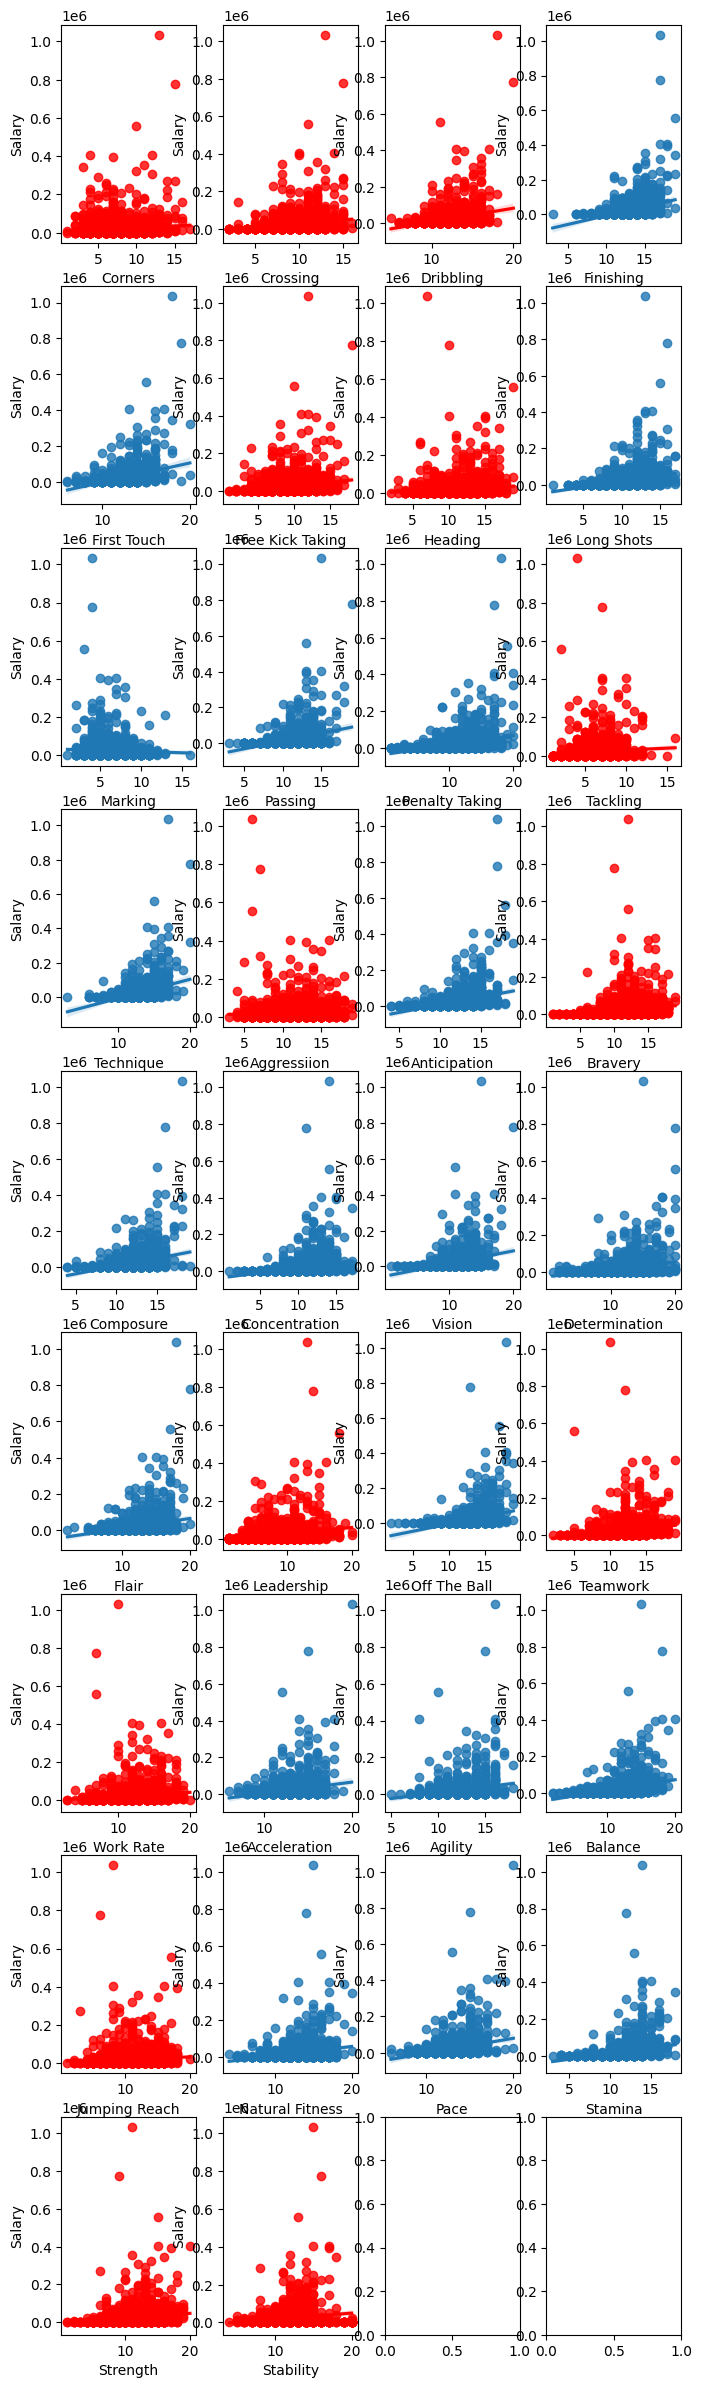

In [23]:
fig, axes = plt.subplots(9, 4, figsize=(8,30))
sns.regplot(x='Corners',  y='Salary', data=sal_att, color = 'r', ax=axes[0,0])
sns.regplot(x='Crossing', y='Salary', data=sal_att,  color = 'r',ax=axes[0,1])
sns.regplot(x='Dribbling',  y='Salary', data=sal_att, color = 'r', ax=axes[0,2])
sns.regplot(x='Finishing',  y='Salary', data=sal_att, ax=axes[0,3])
sns.regplot(x='First Touch',  y='Salary', data=sal_att, ax=axes[1,0])
sns.regplot(x='Free Kick Taking',  y='Salary', data=sal_att, color = 'r', ax=axes[1,1])
sns.regplot(x='Heading',  y='Salary', data=sal_att, color = 'r', ax=axes[1,2])
sns.regplot(x='Long Shots',  y='Salary', data=sal_att, ax=axes[1,3])
sns.regplot(x='Marking',  y='Salary', data=sal_att, ax=axes[2,0])
sns.regplot(x='Passing',  y='Salary', data=sal_att, ax=axes[2,1])
sns.regplot(x='Penalty Taking',  y='Salary', data=sal_att, ax=axes[2,2])
sns.regplot(x='Tackling',  y='Salary', data=sal_att, color = 'r', ax=axes[2,3])
sns.regplot(x='Technique',  y='Salary', data=sal_att, ax=axes[3,0])
sns.regplot(x='Aggressiion',  y='Salary', data=sal_att, color = 'r', ax=axes[3,1])
sns.regplot(x='Anticipation',  y='Salary', data=sal_att, ax=axes[3,2])
sns.regplot(x='Bravery',  y='Salary', data=sal_att, color = 'r', ax=axes[3,3])
sns.regplot(x='Composure',  y='Salary', data=sal_att, ax=axes[4,0])
sns.regplot(x='Concentration',  y='Salary', data=sal_att, ax=axes[4,1])
sns.regplot(x='Vision',  y='Salary', data=sal_att, ax=axes[4,2])
sns.regplot(x='Determination',  y='Salary', data=sal_att, ax=axes[4,3])
sns.regplot(x='Flair',  y='Salary', data=sal_att, ax=axes[5,0])
sns.regplot(x='Leadership',  y='Salary', data=sal_att, color = 'r', ax=axes[5,1])
sns.regplot(x='Off The Ball',  y='Salary', data=sal_att, ax=axes[5,2])
sns.regplot(x='Teamwork',  y='Salary', data=sal_att, color = 'r', ax=axes[5,3])
sns.regplot(x='Work Rate',  y='Salary', data=sal_att, color = 'r', ax=axes[6,0])
sns.regplot(x='Acceleration',  y='Salary', data=sal_att, ax=axes[6,1])
sns.regplot(x='Agility',  y='Salary', data=sal_att, ax=axes[6,2])
sns.regplot(x='Balance',  y='Salary', data=sal_att, ax=axes[6,3])
sns.regplot(x='Jumping Reach',  y='Salary', data=sal_att, color = 'r', ax=axes[7,0])
sns.regplot(x='Natural Fitness',  y='Salary', data=sal_att, ax=axes[7,1])
sns.regplot(x='Pace',  y='Salary', data=sal_att, ax=axes[7,2])
sns.regplot(x='Stamina',  y='Salary', data=sal_att, ax=axes[7,3])
sns.regplot(x='Strength',  y='Salary', data=sal_att, color = 'r', ax=axes[8,0])
sns.regplot(x='Stability',  y='Salary', data=sal_att, color = 'r', ax=axes[8,1])

In [24]:
# 상관관계가 보이는(파란색) 요소만 추출해서 새롭게 저장

sal_att = sal_att[['Finishing', 'First Touch', 'Long Shots', 'Marking', 'Passing', 'Penalty Taking', 'Technique',
'Anticipation', 'Composure', 'Concentration', 'Vision', 'Determination', 'Flair', 'Off The Ball',
'Acceleration', 'Agility', 'Balance', 'Natural Fitness', 'Pace', 'Stamina', 'Salary']]

In [25]:
# LinearRegression을 이용해 공격수의 능력치별 주급 회귀 구현

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# Salary 로그 변환
original_Salary = sal_att['Salary']
sal_att['Salary'] = np.log1p(sal_att['Salary'])

y_target = sal_att['Salary']
X_data = sal_att.drop(['Salary'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 4))

MSE : 1.183 , RMSE : 1.088
Variance score : 0.607
절편 값: -6.550606598197978
회귀 계수값: [ 0.0896  0.0712  0.0448 -0.02    0.074   0.039   0.0417  0.0421  0.0816
  0.0793  0.0472  0.0286  0.0233  0.0542  0.055   0.0133  0.0599  0.0312
  0.208   0.1763]


In [26]:
coeff = pd.Series(data=np.round(lr.coef_, 4), index=X_data.columns )
coeff.sort_values(ascending=False)

Pace               0.2080
Stamina            0.1763
Finishing          0.0896
Composure          0.0816
Concentration      0.0793
Passing            0.0740
First Touch        0.0712
Balance            0.0599
Acceleration       0.0550
Off The Ball       0.0542
Vision             0.0472
Long Shots         0.0448
Anticipation       0.0421
Technique          0.0417
Penalty Taking     0.0390
Natural Fitness    0.0312
Determination      0.0286
Flair              0.0233
Agility            0.0133
Marking           -0.0200
dtype: float64

In [27]:
# 테스트 예측값과 실제 데이터값 비율 비교 결과

y_test.reset_index(drop=True, inplace=True)

compre_df = pd.DataFrame(y_test)
compre_df

y_preds = pd.Series(y_preds)
compre_df['y_preds'] = y_preds

compre_df = compre_df['Salary'] / compre_df['y_preds']
compre_df.mean()

1.0047461471880441

In [28]:
# cross val score 활용

from sklearn.model_selection import cross_val_score

y_target = sal_att['Salary']
X_data = sal_att.drop(['Salary'],axis=1,inplace=False)
lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 4))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 4))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse) )

 5 folds 의 개별 Negative MSE scores:  [-0.8534 -0.8776 -1.019  -1.3417 -3.3803]
 5 folds 의 개별 RMSE scores :  [0.9238 0.9368 1.0094 1.1583 1.8386]
 5 folds 의 평균 RMSE : 1.173 


In [29]:
# 릿지, 라쏘 규제적용
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 4)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = sal_att['Salary']
X_features = sal_att.drop('Salary',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 1.0941
Ridge RMSE: 1.0941
Lasso RMSE: 1.3883


[1.0941050283706892, 1.094096933043023, 1.3882888730102556]

In [30]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 10,20, 40, 50, 100, 250, 500, 1000] }
lasso_params = { 'alpha':[0.0001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 1.2225, 최적 alpha:{'alpha': 0.05}
Lasso 5 CV 시 최적 평균 RMSE 값: 1.2225, 최적 alpha:{'alpha': 0.0001}


In [31]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 1.0941
Ridge RMSE: 1.0941
Lasso RMSE: 1.0941


[1.0941050283706892, 1.0941046229925062, 1.0941079764714474]

In [32]:
# XGBoost

from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 1.3873, 최적 alpha:{'n_estimators': 1000}


In [33]:
# 스태킹 학습

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
스태킹 회귀 모델의 최종 RMSE 값은: 1.0347330584342722
